In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
data = pd.read_csv("C:/Users/bybha/Downloads/Titanic-Dataset.xls")


In [32]:
data = data.drop(columns=["PassengerId", "Name", "SibSp", "Ticket", "Cabin"])


In [33]:
data.describe()
data.isnull().sum()


Survived      0
Pclass        0
Sex           0
Age         177
Parch         0
Fare          0
Embarked      2
dtype: int64

In [34]:
data["Fare"].fillna(data["Fare"].mean(), inplace=True)


C:\Users\bybha\AppData\Local\Temp\ipykernel_29336\3709710861.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Fare"].fillna(data["Fare"].mean(), inplace=True)


In [35]:
from sklearn.linear_model import LinearRegression

Age_data = data[["Survived", "Pclass", "Age", "Fare"]]
with_null = Age_data[Age_data["Age"].isnull()]
without_null = Age_data[Age_data["Age"].notna()]

age_prediction = LinearRegression()
age_prediction.fit(without_null.drop("Age", axis=1), without_null["Age"])

result_age_prediction = age_prediction.predict(with_null.drop("Age", axis=1))
data.loc[data["Age"].isnull(), "Age"] = result_age_prediction


In [36]:
data["Sex_Encoded"] = data["Sex"].map({"male": 1, "female": 2})


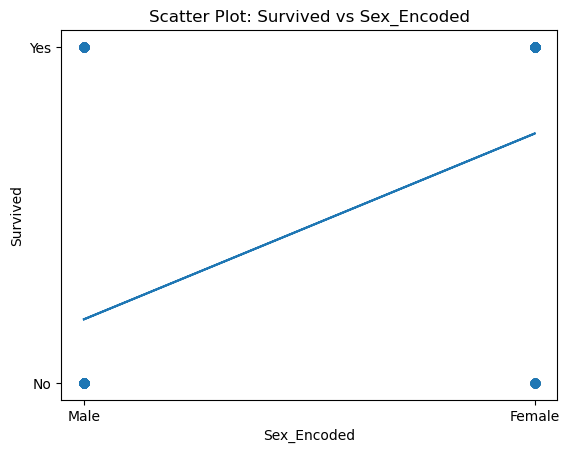

In [37]:
plt.scatter(data["Sex_Encoded"], data["Survived"])
z = np.polyfit(data["Sex_Encoded"], data["Survived"], 1)
p = np.poly1d(z)
plt.plot(data["Sex_Encoded"], p(data["Sex_Encoded"]))

plt.xlabel('Sex_Encoded')
plt.ylabel('Survived')
plt.title('Scatter Plot: Survived vs Sex_Encoded')
plt.yticks([0, 1], ['No', 'Yes'])
plt.xticks([1, 2], ['Male', 'Female'])
plt.show()


In [38]:
data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Sex_Encoded
0,0,3,male,22.0,0,7.2500,S,1
1,1,1,female,38.0,0,71.2833,C,2
2,1,3,female,26.0,0,7.9250,S,2
3,1,1,female,35.0,0,53.1000,S,2
4,0,3,male,35.0,0,8.0500,S,1


In [39]:
average_age_of_surived=data["Age"].mean()
print(average_age_of_surived)

29.2865402605175


In [40]:
data['Sex_Encoded']=data['Sex'].map({"male":1,"female":2})

In [41]:
data.head()

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Sex_Encoded
0,0,3,male,22.0,0,7.2500,S,1
1,1,1,female,38.0,0,71.2833,C,2
2,1,3,female,26.0,0,7.9250,S,2
3,1,1,female,35.0,0,53.1000,S,2
4,0,3,male,35.0,0,8.0500,S,1


In [42]:
from sklearn.linear_model import LinearRegression


In [43]:
age_prediction=LinearRegression()

age_prediction.fit(without_null.drop("Age",axis=1),without_null['Age'])

LinearRegression()

In [44]:
result_age_prediction=age_prediction.predict(with_null.drop('Age',axis=1))

In [45]:
result_age_prediction


array([26.4695118 , 28.60608629, 19.69770102, 26.51478941, 19.67368366,
       26.49016262, 32.82459482, 19.67842692, 19.69754683, 26.49016262,
       26.48450154, 26.21099289, 19.67842692, 25.98413857, 36.90045382,
       44.00313664, 19.40323683, 26.49016262, 26.48450154, 19.6770502 ,
       26.48450154, 26.48450154, 26.49016262, 19.67750911, 19.07634076,
       26.48450154, 26.49551531, 19.14211867, 26.22032522, 26.51157706,
       26.46201509, 24.22667843, 36.18455868, 44.06906507, 25.84508971,
       24.22667843, 35.34791391, 43.18520993, 19.3939045 , 26.49551531,
       19.67842692, 24.22667843, 26.49551531, 26.49016262, 25.84508971,
       26.50285783, 26.24938689, 19.3939045 , 26.5138716 , 35.29611446,
       26.49551531, 26.49551531, 43.88274878, 19.67842692, 35.90043811,
       44.06631163, 44.00313664, 37.08401667, 19.67842692, 19.10938207,
       28.62994947, 26.48450154, 34.13293906, 24.22667843, 19.10938207,
       33.29711497, 26.49016262, 19.37187695, 43.73589849, 26.51

In [46]:
print(f"Missing Age before: {data['Age'].isnull().sum()}")

print(f"Missing Age after: {data['Age'].isnull().sum()}")



Missing Age before: 0
Missing Age after: 0


In [47]:
predictors = ['Survived', 'Pclass', 'Fare']
target = 'Age'


In [48]:
age_data = data[predictors + [target]]

In [49]:
train_rows = age_data.dropna()

In [50]:
predict_rows = age_data[data['Age'].isnull() & data[predictors].notnull().all(axis=1)]

In [51]:
print(f"Training on {train_rows.shape[0]} rows")
print(f"Predicting on {predict_rows.shape[0]} rows")

Training on 891 rows
Predicting on 0 rows


In [52]:
if not train_rows.empty and not predict_rows.empty:
    model = LinearRegression()
    model.fit(train_rows[predictors], train_rows[target])

    predicted_ages = model.predict(predict_rows[predictors])


In [53]:

    print("No data to train or predict — Age imputation skipped.")


No data to train or predict — Age imputation skipped.


In [54]:
data['Age'].head(20)  


0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     26.469512
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    28.606086
18    31.000000
19    19.697701
Name: Age, dtype: float64